In [1]:
### 常规分析包
import os
import time
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import norm, pearsonr, spearmanr
from scipy.spatial import distance
### 绘图包
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.lines as mlines
from matplotlib.font_manager import FontProperties
import matplotlib.dates as mdates
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42 # 输出PDF文字可编辑
### 其他
import cloudpickle as pickle
import warnings
warnings.filterwarnings("ignore") # 报错提示
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all' #last_expr

In [2]:
sns.color_palette(["#4a4a4a", "#00798c", "#d1495b", '#edae49', '#66a182', '#ffe2b3', '#ccffe4'])

[(0.2901960784313726, 0.2901960784313726, 0.2901960784313726),
 (0.0, 0.4745098039215686, 0.5490196078431373),
 (0.8196078431372549, 0.28627450980392155, 0.3568627450980392),
 (0.9294117647058824, 0.6823529411764706, 0.28627450980392155),
 (0.4, 0.6313725490196078, 0.5098039215686274),
 (1.0, 0.8862745098039215, 0.7019607843137254),
 (0.8, 1.0, 0.8941176470588236)]

# 1. Differential taxa count

In [3]:
data = pd.read_csv('../20230718_Results/Table S3Add. Differential taxa.csv', index_col=0)
data.head(2)

,Project,Unmatched_p<0.05,Matched_p<0.05,Overlap_p<0.05,Unmatched_fdr<0.05,Matched_fdr<0.05,Overlap_fdr<0.05,Unmatched_cohen's d>0.2,Matched_cohen's d>0.2,Overlap_cohen's d>0.2,Unmatched_cohen's d>0.5,Matched_cohen's d>0.5,Overlap_cohen's d>0.5
0,08,17,73,17,13,62,12,33,58,29,9,19,7
1,09,48,91,24,9,35,4,225,220,194,59,117,40


(59.67045454545455, 101.26136363636364)

3.708349171489501e-07

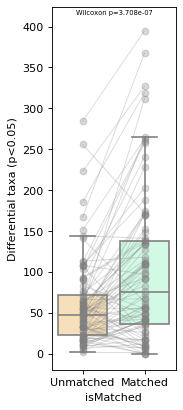

(23.897727272727273, 53.19318181818182)

0.01068351225516622

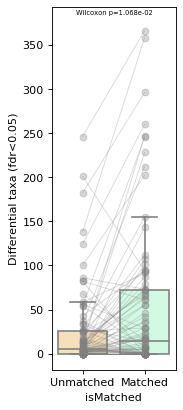

(183.5340909090909, 215.51136363636363)

1.1671169163045373e-05

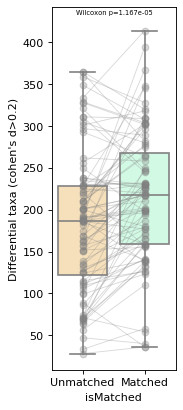

(25.147727272727273, 45.36363636363637)

3.4402770951074805e-08

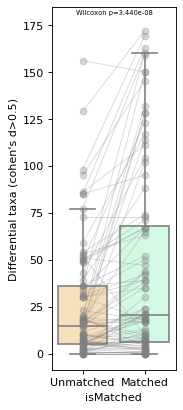

In [5]:
plotdata = []
for i in data.index:
    plotdata.append([data.loc[i, 'Project'], 'Unmatched', data.loc[i, 'Unmatched_p<0.05']])
    plotdata.append([data.loc[i, 'Project'], 'Matched', data.loc[i, 'Matched_p<0.05']])
plotdata = pd.DataFrame(plotdata, columns=['Project', 'isMatched', 'Differential taxa (p<0.05)'])

_ = plt.figure(0, (2, 6), dpi=80)
_ = sns.boxplot(data=plotdata, x="isMatched", y='Differential taxa (p<0.05)', order=["Unmatched", "Matched"], palette=['#ffe2b3', '#ccffe4'], 
                fliersize=0)
for i in data.index:
    _ = plt.plot([0, 1], [data.loc[i, 'Unmatched_p<0.05'], data.loc[i, 'Matched_p<0.05']], '-o', alpha=0.3, color='gray', lw=0.8)

data['Unmatched_p<0.05'].mean(), data['Matched_p<0.05'].mean()
p = stats.wilcoxon(data['Unmatched_p<0.05'], data['Matched_p<0.05'], alternative='two-sided')[1]
p
_ = plt.annotate('Wilcoxon p=%.3e'%p, (-0.1, plt.ylim()[1]), fontsize=6)
_ = plt.ylim([plt.ylim()[0], plt.ylim()[1]+0.02*(plt.ylim()[1]-plt.ylim()[0])])
_ = plt.savefig('../20230718_Results/Figure 3K. Differential taxa (p<0.05).pdf', dpi=300)
_ = plt.show()
####
plotdata = []
for i in data.index:
    plotdata.append([data.loc[i, 'Project'], 'Unmatched', data.loc[i, 'Unmatched_fdr<0.05']])
    plotdata.append([data.loc[i, 'Project'], 'Matched', data.loc[i, 'Matched_fdr<0.05']])
plotdata = pd.DataFrame(plotdata, columns=['Project', 'isMatched', 'Differential taxa (fdr<0.05)'])

_ = plt.figure(0, (2, 6), dpi=80)
_ = sns.boxplot(data=plotdata, x="isMatched", y='Differential taxa (fdr<0.05)', order=["Unmatched", "Matched"], palette=['#ffe2b3', '#ccffe4'], 
                fliersize=0)
for i in data.index:
    _ = plt.plot([0, 1], [data.loc[i, 'Unmatched_fdr<0.05'], data.loc[i, 'Matched_fdr<0.05']], '-o', alpha=0.3, color='gray', lw=0.8)

data['Unmatched_fdr<0.05'].mean(), data['Matched_fdr<0.05'].mean()
p = stats.wilcoxon(data['Unmatched_p<0.05'], data['Matched_fdr<0.05'], alternative='two-sided')[1]
p
_ = plt.annotate('Wilcoxon p=%.3e'%p, (-0.1, plt.ylim()[1]), fontsize=6)
_ = plt.ylim([plt.ylim()[0], plt.ylim()[1]+0.02*(plt.ylim()[1]-plt.ylim()[0])])
_ = plt.savefig('../20230718_Results/Figure 3K. Differential taxa (fdr<0.05).pdf', dpi=300)
_ = plt.show()
####
plotdata = []
for i in data.index:
    plotdata.append([data.loc[i, 'Project'], 'Unmatched', data.loc[i, "Unmatched_cohen's d>0.2"]])
    plotdata.append([data.loc[i, 'Project'], 'Matched', data.loc[i, "Matched_cohen's d>0.2"]])
plotdata = pd.DataFrame(plotdata, columns=['Project', 'isMatched', "Differential taxa (cohen's d>0.2)"])

_ = plt.figure(0, (2, 6), dpi=80)
_ = sns.boxplot(data=plotdata, x="isMatched", y="Differential taxa (cohen's d>0.2)", order=["Unmatched", "Matched"], palette=['#ffe2b3', '#ccffe4'], 
                fliersize=0)
for i in data.index:
    _ = plt.plot([0, 1], [data.loc[i, "Unmatched_cohen's d>0.2"], data.loc[i, "Matched_cohen's d>0.2"]], '-o', alpha=0.3, color='gray', lw=0.8)

data["Unmatched_cohen's d>0.2"].mean(), data["Matched_cohen's d>0.2"].mean()
p = stats.wilcoxon(data["Unmatched_cohen's d>0.2"], data["Matched_cohen's d>0.2"], alternative='two-sided')[1]
p
_ = plt.annotate('Wilcoxon p=%.3e'%p, (-0.1, plt.ylim()[1]), fontsize=6)
_ = plt.ylim([plt.ylim()[0], plt.ylim()[1]+0.02*(plt.ylim()[1]-plt.ylim()[0])])
_ = plt.savefig("../20230718_Results/Figure 3K. Differential taxa (cohen's d>0.2).pdf", dpi=300)
_ = plt.show()
####
plotdata = []
for i in data.index:
    plotdata.append([data.loc[i, 'Project'], 'Unmatched', data.loc[i, "Unmatched_cohen's d>0.5"]])
    plotdata.append([data.loc[i, 'Project'], 'Matched', data.loc[i, "Matched_cohen's d>0.5"]])
plotdata = pd.DataFrame(plotdata, columns=['Project', 'isMatched', "Differential taxa (cohen's d>0.5)"])

_ = plt.figure(0, (2, 6), dpi=80)
_ = sns.boxplot(data=plotdata, x="isMatched", y="Differential taxa (cohen's d>0.5)", order=["Unmatched", "Matched"], palette=['#ffe2b3', '#ccffe4'], 
                fliersize=0)
for i in data.index:
    _ = plt.plot([0, 1], [data.loc[i, "Unmatched_cohen's d>0.5"], data.loc[i, "Matched_cohen's d>0.5"]], '-o', alpha=0.3, color='gray', lw=0.8)

data["Unmatched_cohen's d>0.5"].mean(), data["Matched_cohen's d>0.5"].mean()
p = stats.wilcoxon(data["Unmatched_cohen's d>0.5"], data["Matched_cohen's d>0.5"], alternative='two-sided')[1]
p
_ = plt.annotate('Wilcoxon p=%.3e'%p, (-0.1, plt.ylim()[1]), fontsize=6)
_ = plt.ylim([plt.ylim()[0], plt.ylim()[1]+0.02*(plt.ylim()[1]-plt.ylim()[0])])
_ = plt.savefig("../20230718_Results/Figure 3K. Differential taxa (cohen's d>0.5).pdf", dpi=300)
_ = plt.show()

# 2. Differential taxa

(1505, 88)

((426, 88), (426, 88), (426, 88))

,falsepos,falseneg,change,Class,Order,Family,Genus,Species
k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Propionibacteriales|f__Propionibacteriaceae|g__Cutibacterium|s__Cutibacterium_acnes,0.053571,0.089286,0.142857,Actinobacteria,Propionibacteriales,Propionibacteriaceae,Cutibacterium,Cutibacterium_acnes
k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__Bacteroides_caccae,0.037500,0.137500,0.175000,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,Bacteroides_caccae


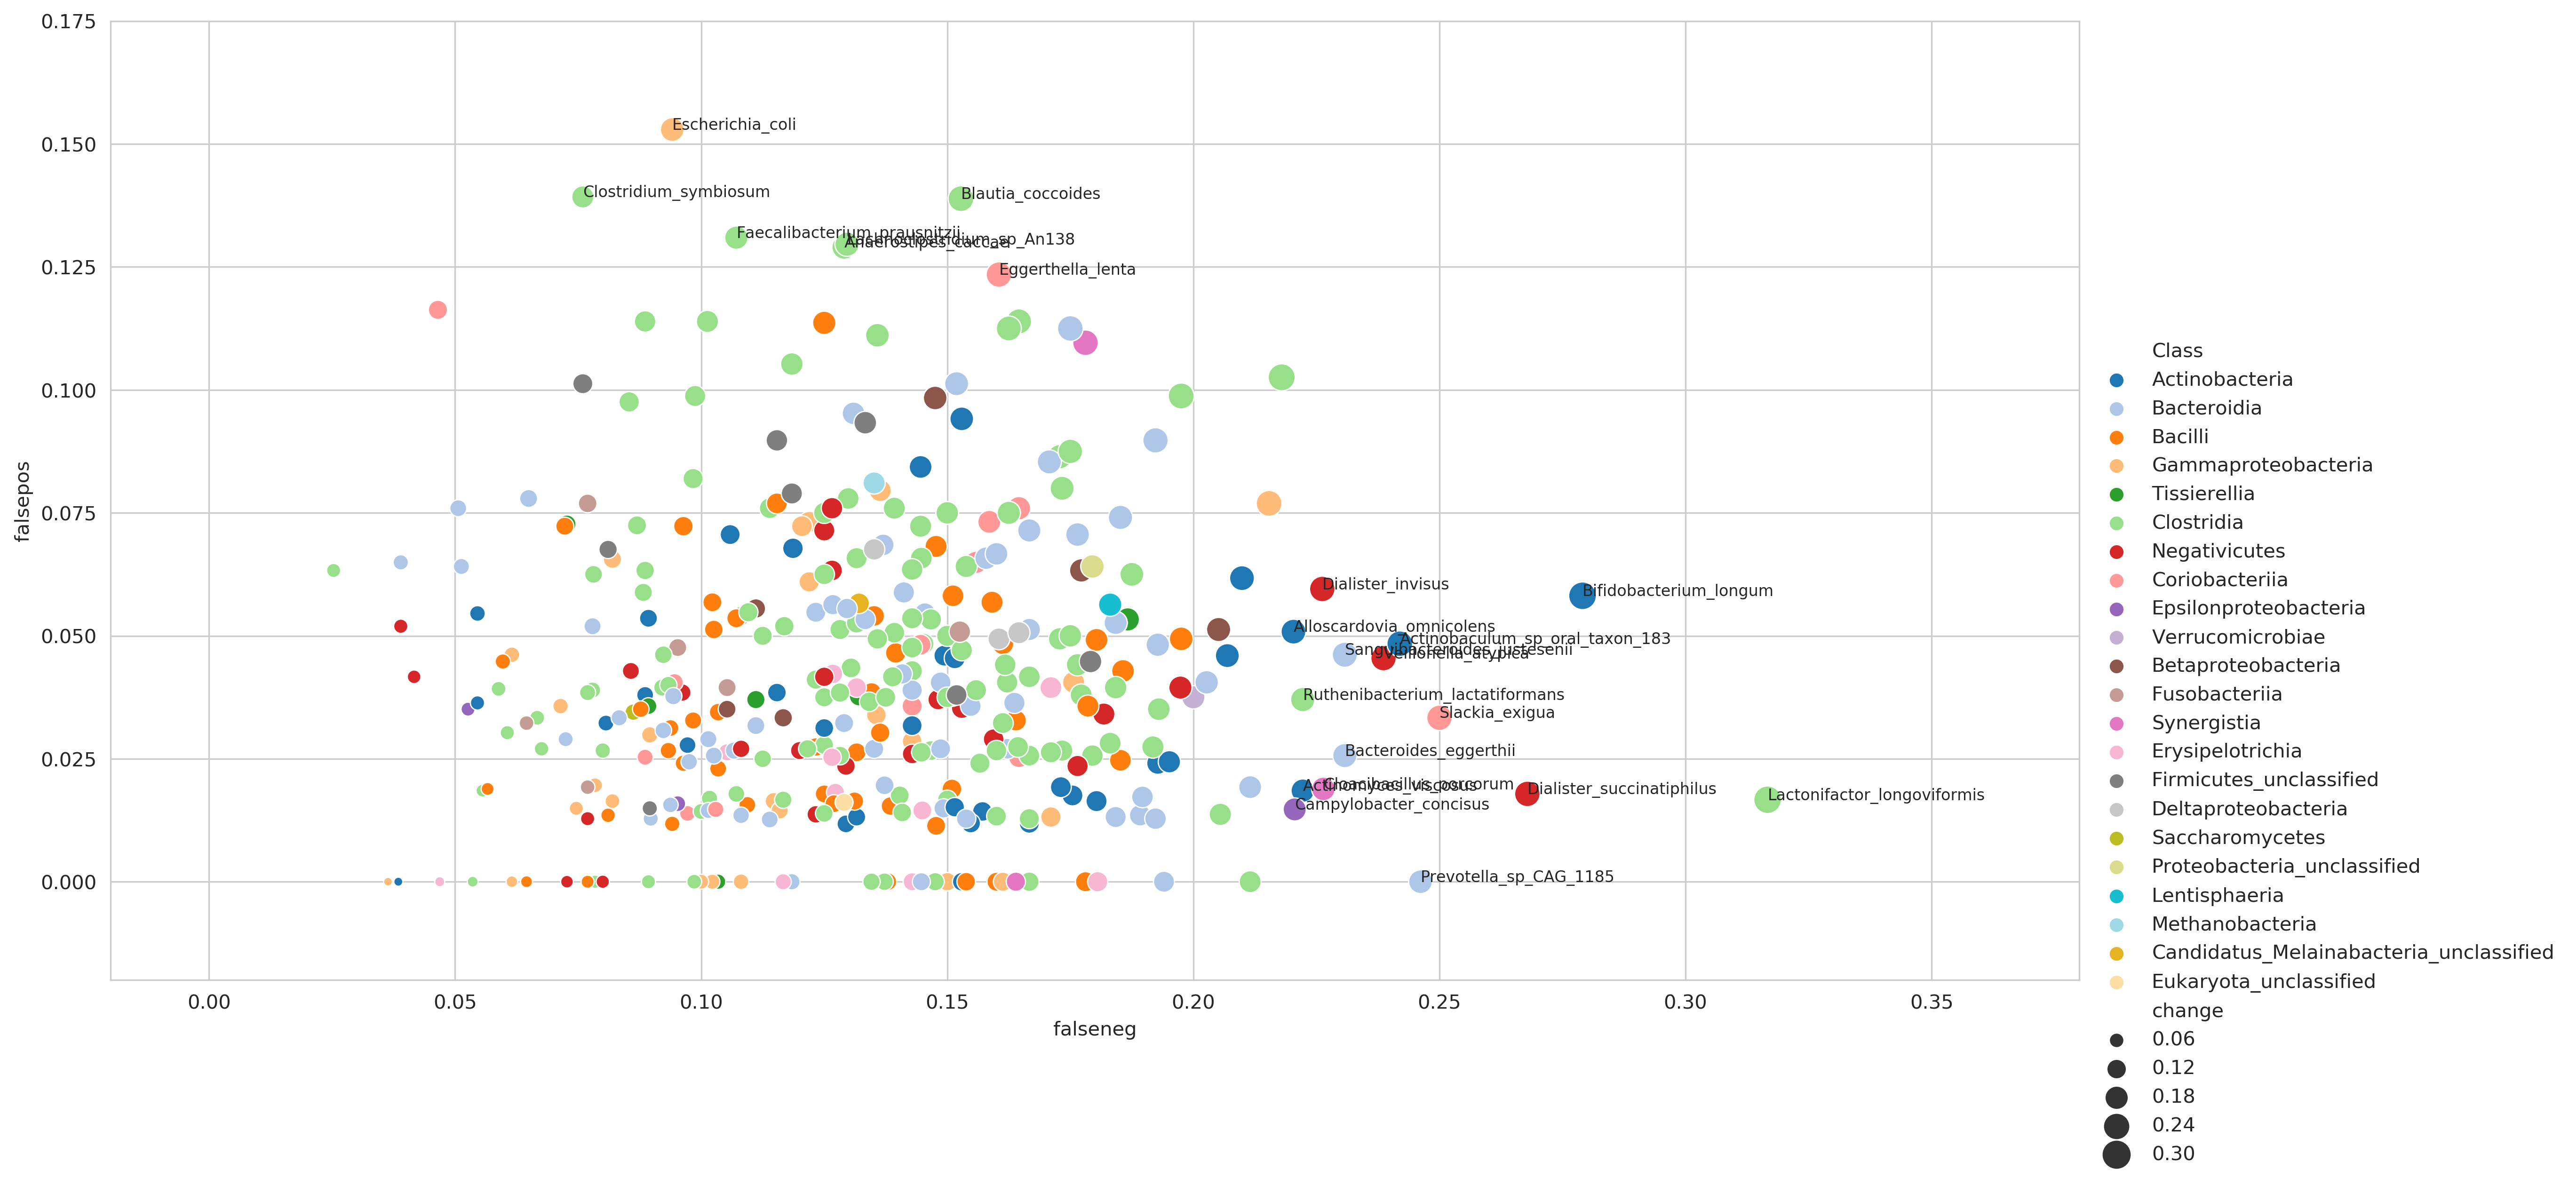

In [152]:
change = pd.read_csv('../20230718_Results/Table SX. Differential taxa_change_pvalue.csv', index_col=0)
falsepos = pd.read_csv('../20230718_Results/Table SX. Differential taxa_falsepos_pvalue.csv', index_col=0)
falseneg = pd.read_csv('../20230718_Results/Table SX. Differential taxa_falseneg_pvalue.csv', index_col=0)
change.shape
change = change.loc[(change.shape[1]-change.isnull().sum(1))>=50, :]
falsepos = falsepos.loc[change.index, :]
falseneg = falseneg.loc[change.index, :]
change.shape, falsepos.shape, falseneg.shape
####
plotdata = pd.DataFrame()
plotdata['falsepos'] = falsepos.sum(1)/(change.shape[1]-change.isnull().sum(1))
plotdata['falseneg'] = falseneg.sum(1)/(change.shape[1]-change.isnull().sum(1))
plotdata['change'] = change.sum(1)/(change.shape[1]-change.isnull().sum(1))
plotdata['Class'] = [i.split('|c__')[1].split('|o__')[0].strip() for i in plotdata.index]
plotdata['Order'] = [i.split('|o__')[1].split('|f__')[0].strip() for i in plotdata.index]
plotdata['Family'] = [i.split('|f__')[1].split('|g__')[0].strip() for i in plotdata.index]
plotdata['Genus'] = [i.split('|g__')[1].split('|s__')[0].strip() for i in plotdata.index]
plotdata['Species'] = [i.split('|s__')[1].strip() for i in plotdata.index]
plotdata.head(2)
###
fig = plt.figure(0, (18, 9), dpi=300)
_ = sns.set_style("whitegrid")
palette = list(sns.color_palette('tab20'))
palette.extend([(230/255., 180/255., 34/255.), (253/255., 222/255., 165/255.),])
_ = sns.scatterplot(data=plotdata, x="falseneg", y="falsepos", size="change", sizes=(20, 200), hue='Class', palette=palette)
for i in plotdata.index:
    if plotdata.loc[i, 'falsepos']>0.12 or plotdata.loc[i, 'falseneg']>0.22:
        _ = plt.annotate(plotdata.loc[i, 'Species'], (plotdata.loc[i, 'falseneg'], plotdata.loc[i, 'falsepos']), fontsize=8)
_ = plt.xlim(-0.02, 0.38)
_ = plt.ylim(-0.02, 0.175)
_ = plt.legend(loc=(1.005, -0.2), frameon=False)
_ = plt.savefig("../20230718_Results/Figure 3L. Differential taxa (p<0.05).pdf", dpi=300)
_ = plt.show()

In [160]:
(falsepos.sum(1)/(change.shape[1]-change.isnull().sum(1))).sort_values().tail(2)
taxa = 'k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Barnesiellaceae|g__Barnesiella|s__Barnesiella_intestinihominis'
falsepos.sum(1)[taxa], (change.shape[1]-change.isnull().sum(1))[taxa]

k__Eukaryota|p__Eukaryota_unclassified|c__Eukaryota_unclassified|o__Eukaryota_unclassified|f__Entamoebidae|g__Entamoeba|s__Entamoeba_histolytica   NaN
k__Eukaryota|p__Eukaryota_unclassified|c__Eukaryota_unclassified|o__Kinetoplastida|f__Trypanosomatidae|g__Leishmania|s__Leishmania_braziliensis    NaN
dtype: float64

(5.0, 78)

In [158]:
(falseneg.sum(1)/(change.shape[1]-change.isnull().sum(1))).sort_values().tail(3)
taxa = 'k__Bacteria|p__Firmicutes|c__Negativicutes|o__Veillonellales|f__Veillonellaceae|g__Dialister|s__Dialister_succinatiphilus'
falseneg.sum(1)[taxa], (change.shape[1]-change.isnull().sum(1))[taxa]

k__Bacteria|p__Firmicutes|c__Negativicutes|o__Veillonellales|f__Veillonellaceae|g__Dialister|s__Dialister_succinatiphilus                  0.267857
k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium_longum    0.279070
k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Clostridiaceae|g__Lactonifactor|s__Lactonifactor_longoviformis                 0.316667
dtype: float64

(15.0, 56)

(1505, 88)

((426, 88), (426, 88), (426, 88))

,falsepos,falseneg,change,Class,Order,Family,Genus,Species
k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Propionibacteriales|f__Propionibacteriaceae|g__Cutibacterium|s__Cutibacterium_acnes,0.142857,0.089286,0.232143,Actinobacteria,Propionibacteriales,Propionibacteriaceae,Cutibacterium,Cutibacterium_acnes
k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__Bacteroides_caccae,0.125000,0.237500,0.362500,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,Bacteroides_caccae


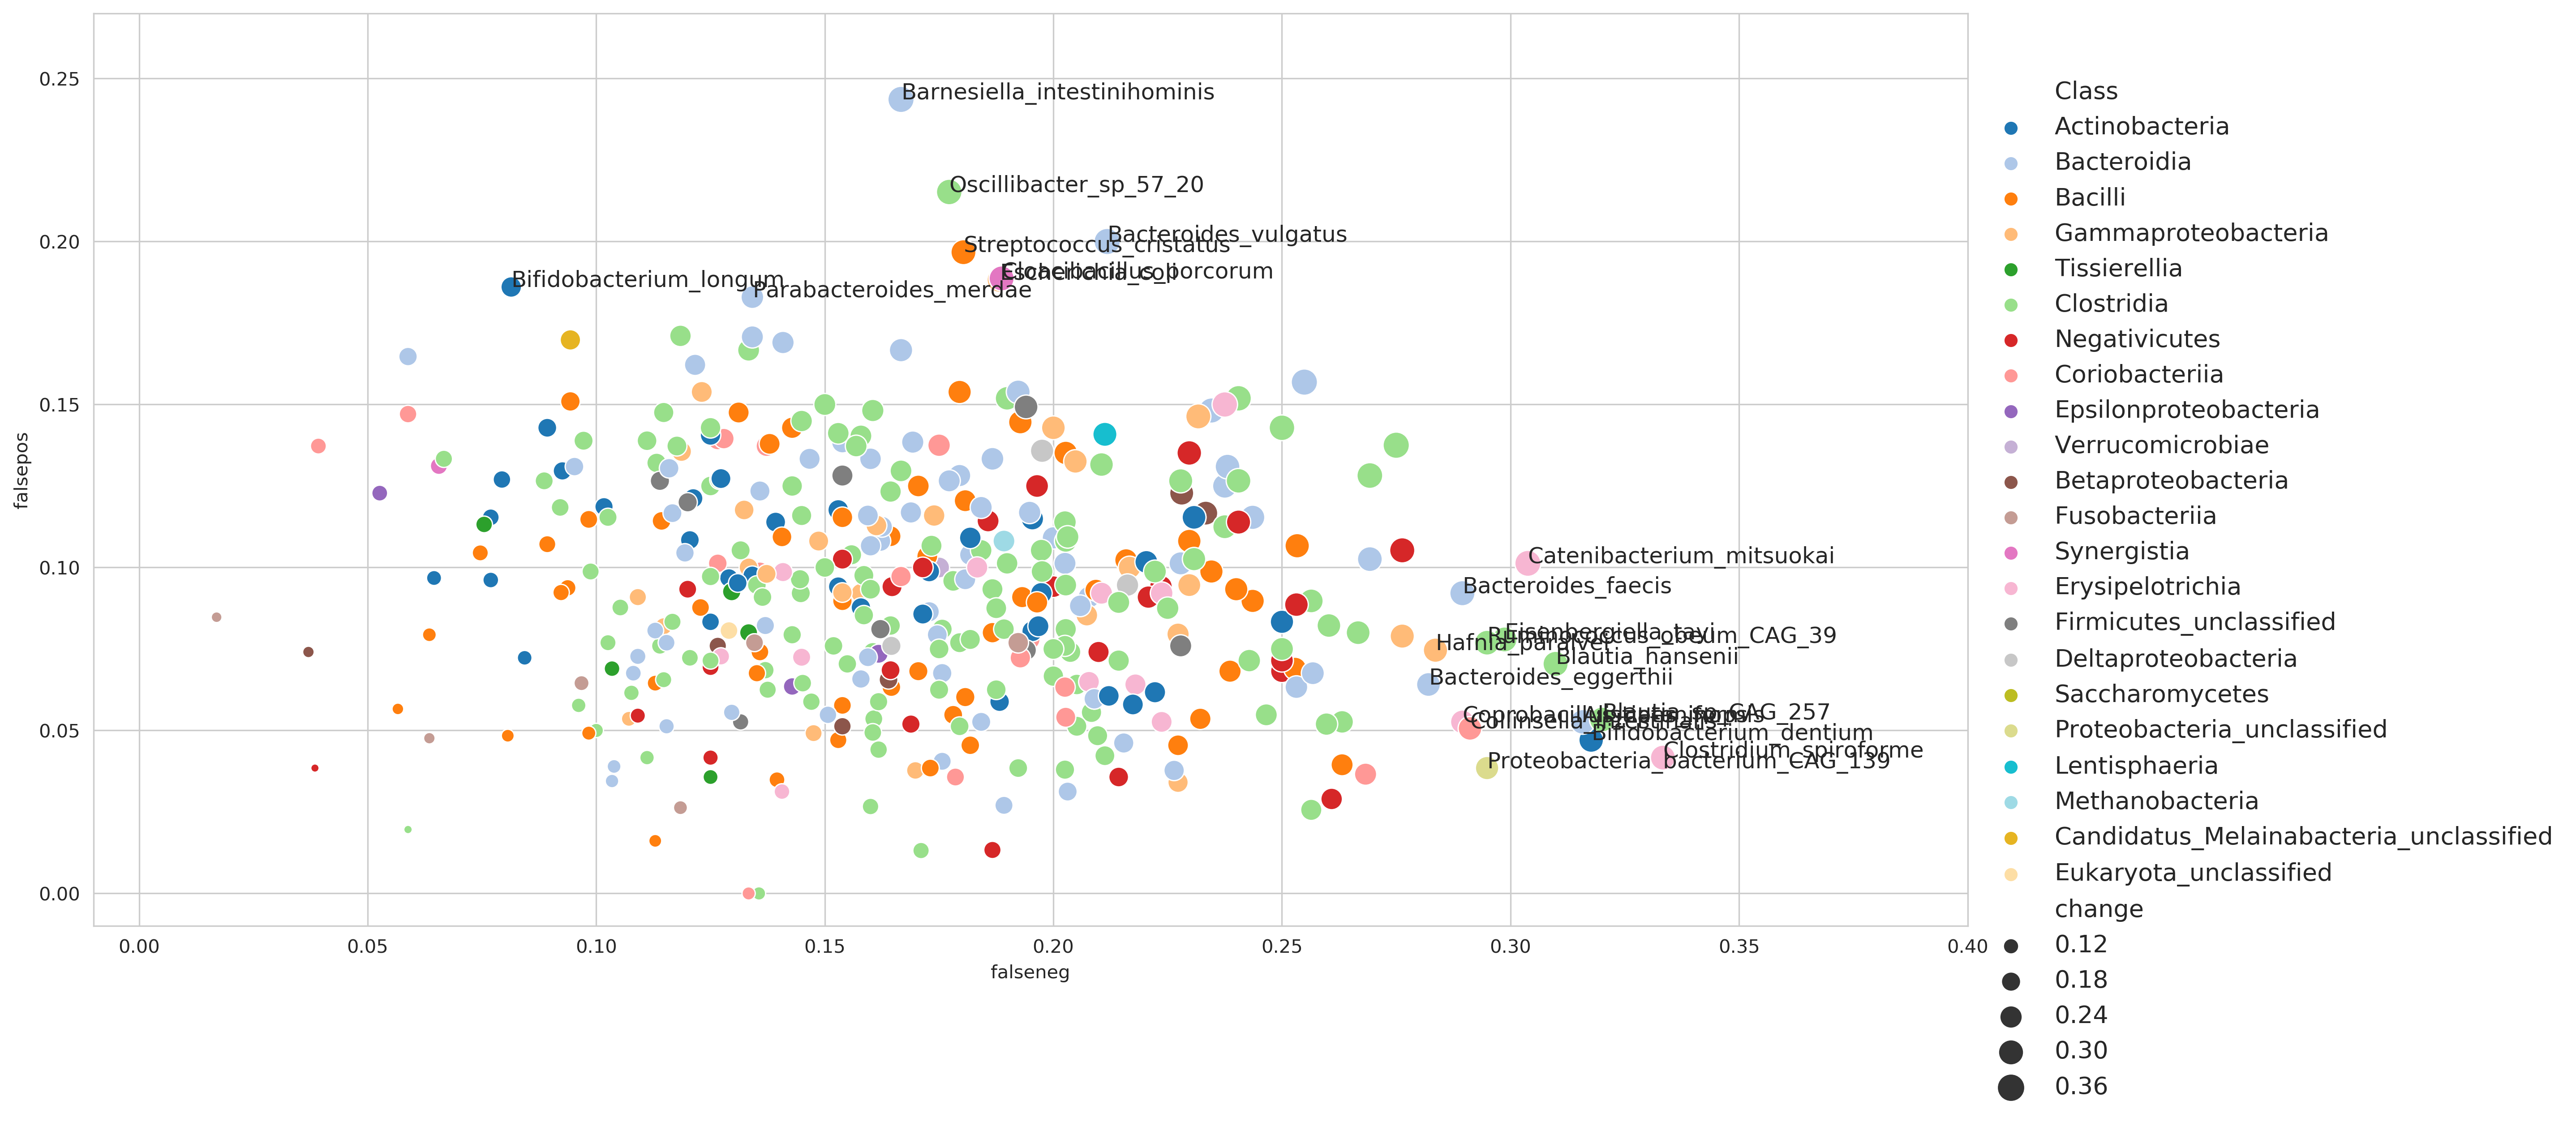

In [161]:
change = pd.read_csv('../20230718_Results/Table SX. Differential taxa_change_cohend.csv', index_col=0)
falsepos = pd.read_csv('../20230718_Results/Table SX. Differential taxa_falsepos_cohend.csv', index_col=0)
falseneg = pd.read_csv('../20230718_Results/Table SX. Differential taxa_falseneg_cohend.csv', index_col=0)
change.shape
change = change.loc[(change.shape[1]-change.isnull().sum(1))>=50, :]
falsepos = falsepos.loc[change.index, :]
falseneg = falseneg.loc[change.index, :]
change.shape, falsepos.shape, falseneg.shape
####
plotdata = pd.DataFrame()
plotdata['falsepos'] = falsepos.sum(1)/(change.shape[1]-change.isnull().sum(1))
plotdata['falseneg'] = falseneg.sum(1)/(change.shape[1]-change.isnull().sum(1))
plotdata['change'] = change.sum(1)/(change.shape[1]-change.isnull().sum(1))
plotdata['Class'] = [i.split('|c__')[1].split('|o__')[0].strip() for i in plotdata.index]
plotdata['Order'] = [i.split('|o__')[1].split('|f__')[0].strip() for i in plotdata.index]
plotdata['Family'] = [i.split('|f__')[1].split('|g__')[0].strip() for i in plotdata.index]
plotdata['Genus'] = [i.split('|g__')[1].split('|s__')[0].strip() for i in plotdata.index]
plotdata['Species'] = [i.split('|s__')[1].strip() for i in plotdata.index]
plotdata.head(2)
###
fig = plt.figure(0, (18, 9), dpi=300)
_ = sns.set_style("whitegrid")
palette = list(sns.color_palette('tab20'))
palette.extend([(230/255., 180/255., 34/255.), (253/255., 222/255., 165/255.),])
_ = sns.scatterplot(data=plotdata, x="falseneg", y="falsepos", size="change", sizes=(20, 200), hue='Class', palette=palette)
_ = plt.plot([0, 0], [1, 1], lw=1)
for i in plotdata.index:
    if plotdata.loc[i, 'falsepos']>0.18 or plotdata.loc[i, 'falseneg']>0.28:
        _ = plt.annotate(plotdata.loc[i, 'Species'], (plotdata.loc[i, 'falseneg'], plotdata.loc[i, 'falsepos']), fontsize=12)
_ = plt.xlim(-0.01, 0.4)
_ = plt.ylim(-0.01, 0.27)
_ = plt.legend(loc=(1.005, -0.2), frameon=False, fontsize=13)
_ = plt.savefig("../20230718_Results/Figure 3L. Differential taxa (cohen's d>0.2).pdf", dpi=300)
_ = plt.show()

In [162]:
(falsepos.sum(1)/(change.shape[1]-change.isnull().sum(1))).sort_values().tail(2)
taxa = 'k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Barnesiellaceae|g__Barnesiella|s__Barnesiella_intestinihominis'
falsepos.sum(1)[taxa], (change.shape[1]-change.isnull().sum(1))[taxa]

k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Oscillospiraceae|g__Oscillibacter|s__Oscillibacter_sp_57_20           0.21519
k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Barnesiellaceae|g__Barnesiella|s__Barnesiella_intestinihominis    0.24359
dtype: float64

(19.0, 78)

In [165]:
(falseneg.sum(1)/(change.shape[1]-change.isnull().sum(1))).sort_values().tail(3)
taxa = 'k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium_dentium'
falseneg.sum(1)[taxa], (change.shape[1]-change.isnull().sum(1))[taxa]

k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium_dentium          0.317647
k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Lachnospiraceae|g__Blautia|s__Blautia_sp_CAG_257                                      0.320000
k__Bacteria|p__Firmicutes|c__Erysipelotrichia|o__Erysipelotrichales|f__Erysipelotrichaceae|g__Erysipelatoclostridium|s__Clostridium_spiroforme    0.333333
dtype: float64

(27.0, 85)

# 3. Example taxa

In [159]:
falsepos = pd.read_csv('../20230718_Results/Table SX. Differential taxa_falsepos_pvalue.csv', index_col=0)
falseneg = pd.read_csv('../20230718_Results/Table SX. Differential taxa_falseneg_pvalue.csv', index_col=0)
taxa = 'k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Enterobacterales|f__Enterobacteriaceae|g__Escherichia|s__Escherichia_coli'
projects = ['27', '78', '99_1', '99_2', '91', '87', '74', '68']

08      False
09      False
100     False
101     False
11      False
        ...  
96      False
97      False
99_1    False
99_2     True
99_3     True
Name: k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Enterobacterales|f__Enterobacteriaceae|g__Escherichia|s__Escherichia_coli, Length: 88, dtype: object